In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

img = cv2.imread('Problems/Basic Problems B/Basic Problem B-01/2.png')
# img = cv2.imread('Problems/Basic Problems B/Basic Problem B-01/Basic Problem B-01.PNG')


In [3]:

print(img.shape)

(184, 184, 3)


In [40]:
if img is not None:
    # Display the image in a window
    cv2.imshow('Image title', img)
    # Wait indefinitely until a key is pressed
    cv2.waitKey(0)
    # Destroy all OpenCV windows
    cv2.destroyAllWindows()
else:
    print("Error: Image not found or unable to load.")

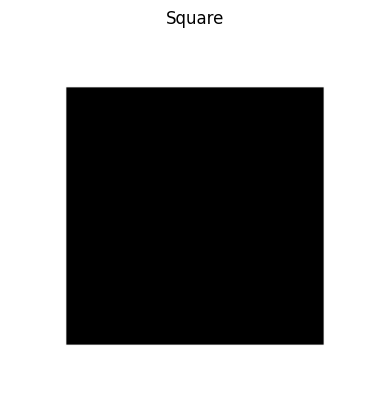

In [6]:
# show with matplotlib
if img is not None:
    # Convert the image from BGR to RGB format
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Plot the image using matplotlib
    
    # plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.title('Square')
    plt.axis('off')  # Turn off axis labels
    plt.show()
    
else:
    print("Error: Image not found or unable to load.")

## Lets try to see if we can rotate an image

oh you may like this one, it has roations, reflection, scalling and cropping

[geek-stuff](https://www.geeksforgeeks.org/image-transformations-using-opencv-in-python/)


(184, 184, 3)


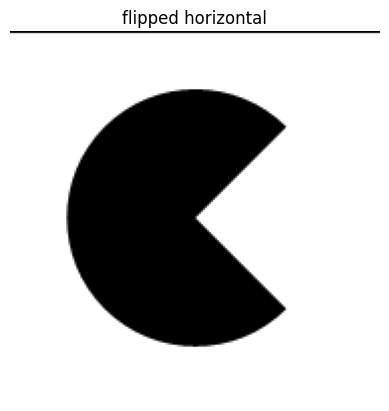

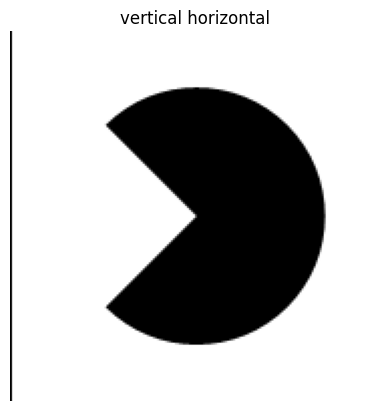

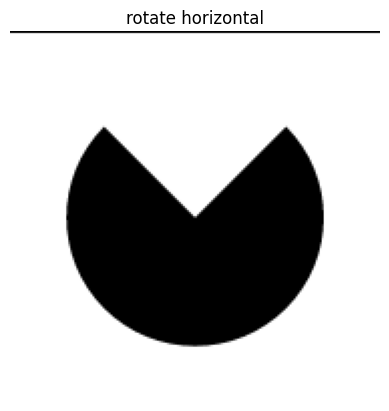

In [26]:
# flip/
# from https://www.geeksforgeeks.org/image-transformations-using-opencv-in-python/
if img is not None:
    print(img.shape)
    img_flipping = cv2.imread('Problems/Basic Problems B/Basic Problem B-01/4.png')
    # convert to grey so its a 2d array 
    # https://stackoverflow.com/questions/21596281/how-does-one-convert-a-grayscale-image-to-rgb-in-opencv-python
    cv2.cvtColor(img_flipping, cv2.COLOR_BGR2GRAY)
    
    # horizontally
    rows, cols = img_flipping.shape
    flip_horizontal = np.float32([[1,  0, 0],
                [0, -1, rows],
                [0,  0, 1]])
    horizontal_img = cv2.warpPerspective(img_flipping, flip_horizontal,
                                   (int(cols),
                                    int(rows)))

    
    
    # vertically 
    rows, cols = img_flipping.shape
    flip_vertical = np.float32([[-1, 0, cols], [0, 1, 0], [0, 0, 1]])
    vertical_img = cv2.warpPerspective(img_flipping, flip_vertical,
                                   (int(cols),
                                    int(rows)))
    
    # rotate 45 degrees
    rows, cols = img_flipping.shape[:2]
    M = np.float32([[1,  0, 0], [0, -1, rows], [0,  0, 1]])
    img_rotation = cv2.warpAffine(img_flipping,
                             cv2.getRotationMatrix2D((cols/2, rows/2),
                                                    90, 1),
                             (cols, rows))
    
    
    
    plt.imshow(horizontal_img)
    plt.title('flipped horizontal')
    plt.axis('off')  # Turn off axis labels
    plt.show()


    plt.imshow(vertical_img)
    plt.title('vertical horizontal')
    plt.axis('off')  # Turn off axis labels
    plt.show()
    
    plt.imshow(img_rotation)
    plt.title('rotate horizontal')
    plt.axis('off')  # Turn off axis labels
    plt.show()
    

#### Lets try to compare images


In [ ]:
if img is not None:
    